<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [37]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [52]:
# IMPORT LIBRARIES
import os
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


### 1. Import the data

In [40]:
csv_file = 'ais.csv'
df = pd.read_csv(csv_file)

### 2. Do some EDA of relationships between features.

In [9]:
print(df.head())

   Unnamed: 0   rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm  \
0           1  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32   
1           2  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55   
2           3  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36   
3           4  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18   
4           5  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20   

      ht    wt sex   sport  
0  195.9  78.9   f  B_Ball  
1  189.7  74.4   f  B_Ball  
2  177.8  69.1   f  B_Ball  
3  185.0  74.9   f  B_Ball  
4  184.6  64.6   f  B_Ball  


In [13]:
print(df.describe())

       Unnamed: 0         rcc         wcc          hc          hg        ferr  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean   101.500000    4.718614    7.108911   43.091584   14.566337   76.876238   
std     58.456537    0.457976    1.800337    3.662989    1.362451   47.501239   
min      1.000000    3.800000    3.300000   35.900000   11.600000    8.000000   
25%     51.250000    4.372500    5.900000   40.600000   13.500000   41.250000   
50%    101.500000    4.755000    6.850000   43.500000   14.700000   65.500000   
75%    151.750000    5.030000    8.275000   45.575000   15.575000   97.000000   
max    202.000000    6.720000   14.300000   59.700000   19.200000  234.000000   

              bmi         ssf      pcBfat         lbm          ht          wt  
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000  
mean    22.955891   69.021782   13.507426   64.873713  180.103960   75.007921  
std      2.863933   32.565333 

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB
None


In [17]:
df = df.drop(columns=['Unnamed: 0'])

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB
None


C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gillb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

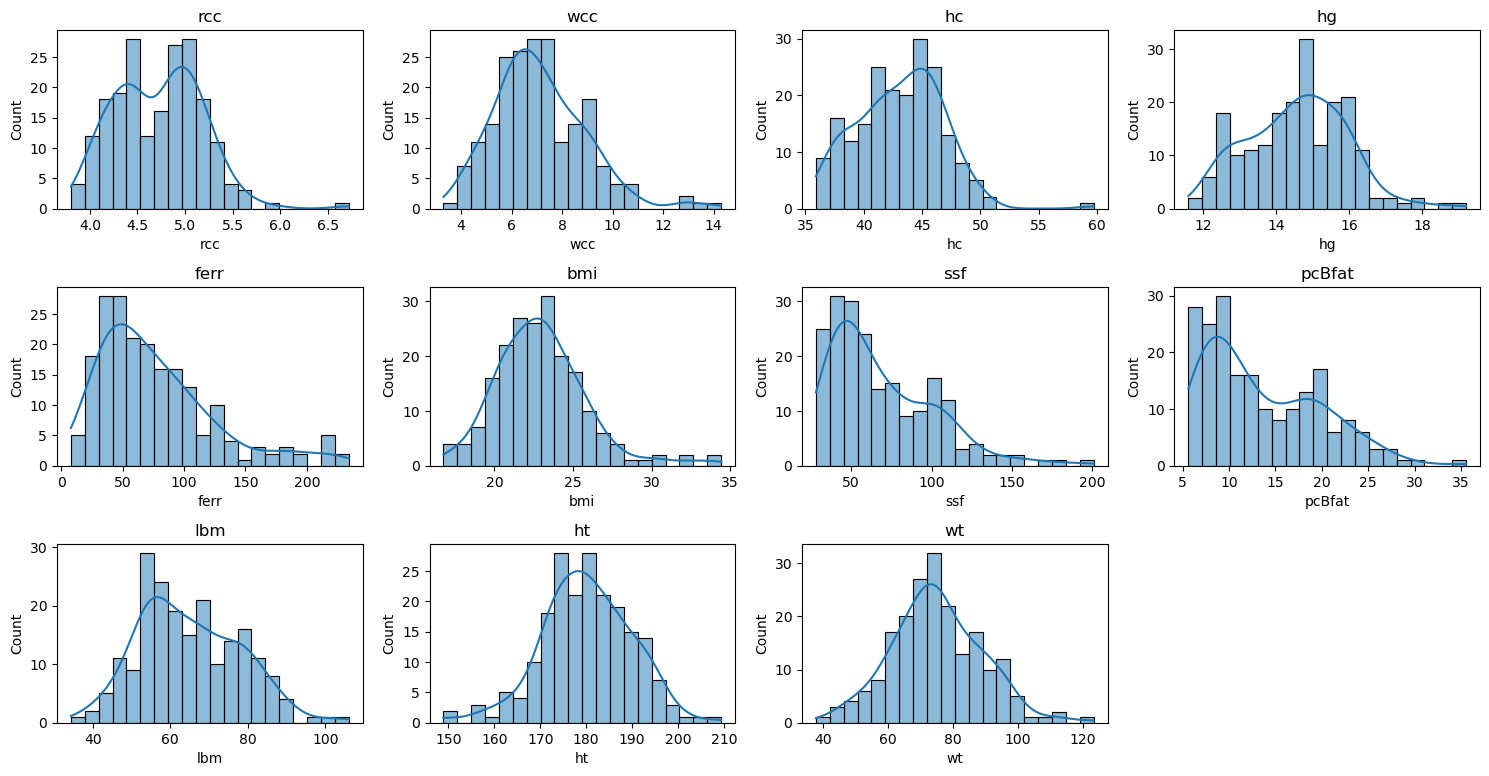

In [36]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

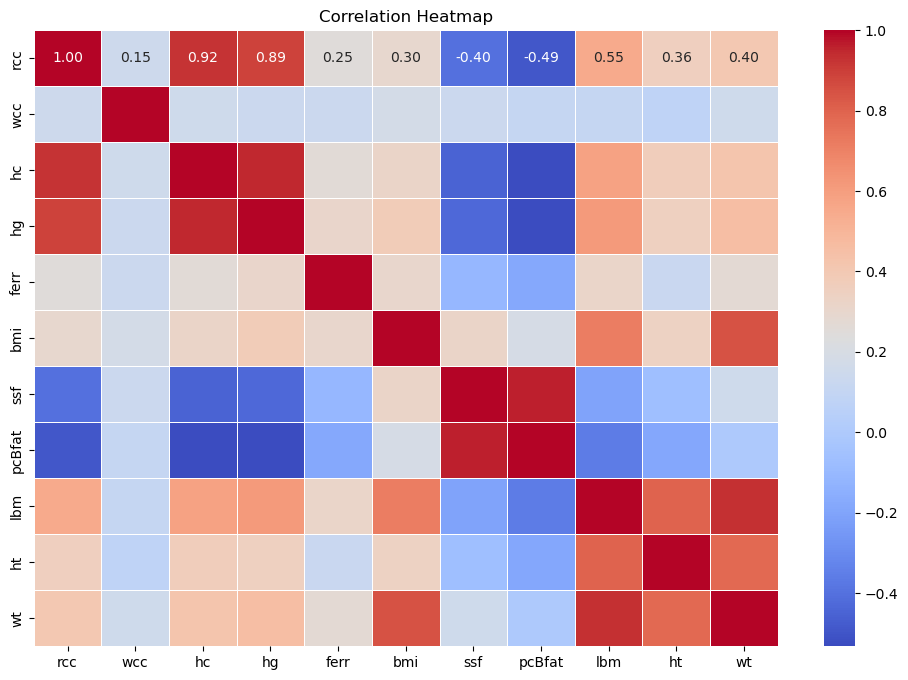

In [46]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [56]:
# ANSWER
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df_features = df.drop(columns=['sex', 'sport'])
print(df_features.head())

    rcc  wcc    hc    hg  ferr    bmi    ssf  pcBfat    lbm     ht    wt
0  3.96  7.5  37.5  12.3    60  20.56  109.1   19.75  63.32  195.9  78.9
1  4.41  8.3  38.2  12.7    68  20.67  102.8   21.30  58.55  189.7  74.4
2  4.14  5.0  36.4  11.6    21  21.86  104.6   19.88  55.36  177.8  69.1
3  4.11  5.3  37.3  12.6    69  21.88  126.4   23.66  57.18  185.0  74.9
4  4.45  6.8  41.5  14.0    29  18.96   80.3   17.64  53.20  184.6  64.6


In [58]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled, columns=df_features.columns)
print(df_scaled.head())

        rcc       wcc        hc        hg      ferr       bmi       ssf  \
0 -1.660563  0.217771 -1.530301 -1.667558 -0.356163 -0.838652  1.233760   
1 -0.675538  0.663236 -1.338725 -1.373240 -0.187328 -0.800148  1.039822   
2 -1.266553 -1.174308 -1.831348 -2.182615 -1.179234 -0.383603  1.095232   
3 -1.332221 -1.007259 -1.585037 -1.446820 -0.166223 -0.376602  1.766319   
4 -0.587981 -0.172011 -0.435584 -0.416707 -1.010399 -1.398713  0.347186   

     pcBfat       lbm        ht        wt  
0  1.011027 -0.119170  1.626719  0.280193  
1  1.262060 -0.485029  0.988226 -0.043765  
2  1.032082 -0.729702 -0.237268 -0.425315  
3  1.644279 -0.590108  0.504207 -0.007769  
4  0.669299 -0.895374  0.463014 -0.749273  


### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [60]:
# ANSWER
def run_kmeans(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(data)
    data['Cluster'] = clusters
    return data
    

In [62]:
# Run K-Means with k=2
df_k2 = run_kmeans(n_clusters=2, data=df_scaled.copy())
# Run K-Means with k=4
df_k4 = run_kmeans(n_clusters=4, data=df_scaled.copy())

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
df['Cluster_k2'] = df_k2['Cluster']
df['Cluster_k4'] = df_k4['Cluster']


In [66]:
df_comparison_k2 = df[['sex', 'Cluster_k2']]
df_comparison_k4 = df[['sex', 'Cluster_k4']]


In [68]:
cluster_sex_distribution_k2 = df_comparison_k2.groupby(['sex', 'Cluster_k2']).size().unstack()
cluster_sex_distribution_k4 = df_comparison_k4.groupby(['sex', 'Cluster_k4']).size().unstack()

print("Cluster Distribution for k=2:")
print(cluster_sex_distribution_k2)

print("\nCluster Distribution for k=4:")
print(cluster_sex_distribution_k4)

Cluster Distribution for k=2:
Cluster_k2   0   1
sex               
f            4  96
m           98   4

Cluster Distribution for k=4:
Cluster_k4     0     1     2     3
sex                               
f            2.0  55.0   1.0  42.0
m           51.0   NaN  47.0   4.0


In [74]:
df_comparison_k4 = df[['sex', 'Cluster_k4']]
print(df_comparison_k4['Cluster_k4'].unique())

[1 3 0 2]


In [70]:
kmeans_k4 = KMeans(n_clusters=4, random_state=0)
kmeans_k4.fit(df_scaled)
centers_k4 = kmeans_k4.cluster_centers_
print(pd.DataFrame(centers_k4, columns=df_scaled.columns))


C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        rcc       wcc        hc        hg      ferr       bmi       ssf  \
0  0.833594 -0.191973  0.809915  0.798048  0.064332 -0.188375 -0.798494   
1 -0.857022 -0.048496 -0.915767 -0.883603 -0.393383  0.106641  1.223741   
2  0.588577  0.469505  0.648300  0.697715  0.743903  1.064970 -0.134259   
3 -0.549912 -0.210747 -0.514713 -0.591059 -0.380020 -1.021737 -0.403068   

     pcBfat       lbm        ht        wt  
0 -0.910086  0.299743  0.249471 -0.022847  
1  1.304081 -0.539932 -0.193079 -0.084079  
2 -0.333585  1.326338  0.946818  1.289113  
3 -0.162561 -1.083789 -1.044563 -1.218308  


### 5. Get the labels for the models using the labels_ attribute.

In [80]:
# ANSWER
kmeans_k2 = KMeans(n_clusters=2, random_state=0)
df['Cluster_k2'] = kmeans_k2.fit_predict(df_scaled)

labels_k2 = kmeans_k2.labels_
print("Cluster labels for k=2:")
print(labels_k2)

C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels for k=2:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [82]:
kmeans_k4 = KMeans(n_clusters=4, random_state=0)
df['Cluster_k4'] = kmeans_k4.fit_predict(df_scaled)
labels_k4 = kmeans_k4.labels_
print("Cluster labels for k=4:")
print(labels_k4)


C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels for k=4:
[1 1 1 1 3 3 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 3 1 1 3 1 1 1 1 1 1 3 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 3 1 3 3 1 1 3 3 3 3 3 3 0 1 1 1 1 0
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 2 0 2 0
 0 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 0 0 0 3 0 0 0 2 2 0 0
 0 0 0 0 3 0 3 0 0 0 0 2 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 2 2 2 2
 2 2 0 2 2 0 2 0 2 2 2 0 2 0 0 0 0]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [90]:
# ANSWER
# Range of k values
k_range = range(1, 11)  # Example range: 1 to 10 clusters
inertia = []

# Compute inertia for each k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)  # Fit the model
    inertia.append(kmeans.inertia_) 



C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gillb\anaconda3\Lib\site-packages\sklearn\clust

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

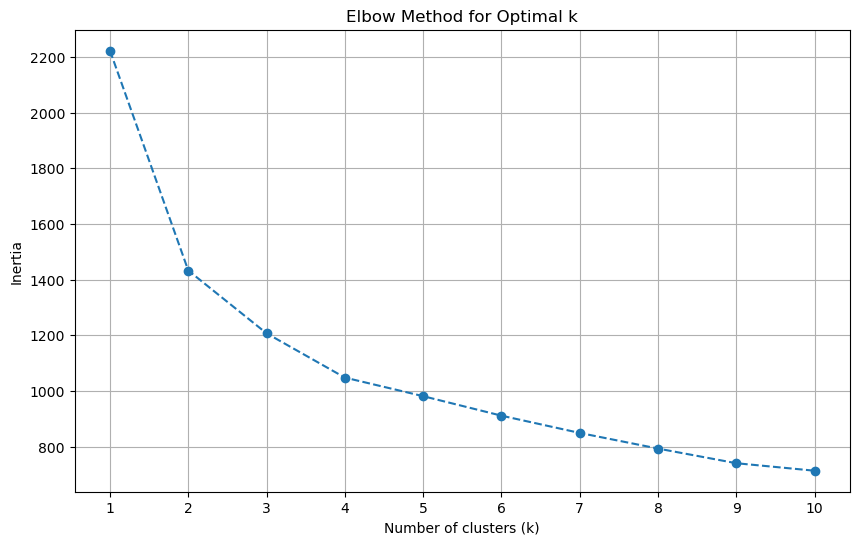

In [94]:
# ANSWER
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

Text(0, 0.5, 'Percent Body Fat (pcBfat)')

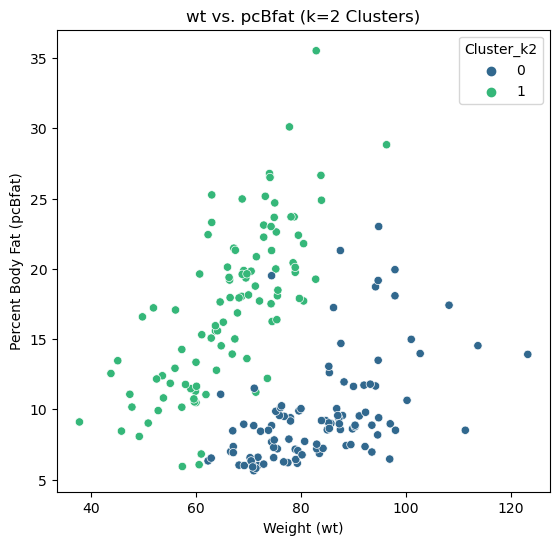

In [96]:
# ANSWER
# Plot wt vs. pcBfat using the clusters from each model
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['wt'], y=df['pcBfat'], hue=df['Cluster_k2'], palette='viridis', legend='full')
plt.title('wt vs. pcBfat (k=2 Clusters)')
plt.xlabel('Weight (wt)')
plt.ylabel('Percent Body Fat (pcBfat)')


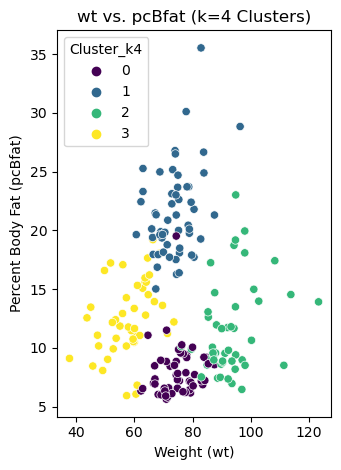

In [98]:
# Plot for k=4 clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['wt'], y=df['pcBfat'], hue=df['Cluster_k4'], palette='viridis', legend='full')
plt.title('wt vs. pcBfat (k=4 Clusters)')
plt.xlabel('Weight (wt)')
plt.ylabel('Percent Body Fat (pcBfat)')

plt.tight_layout()
plt.show()

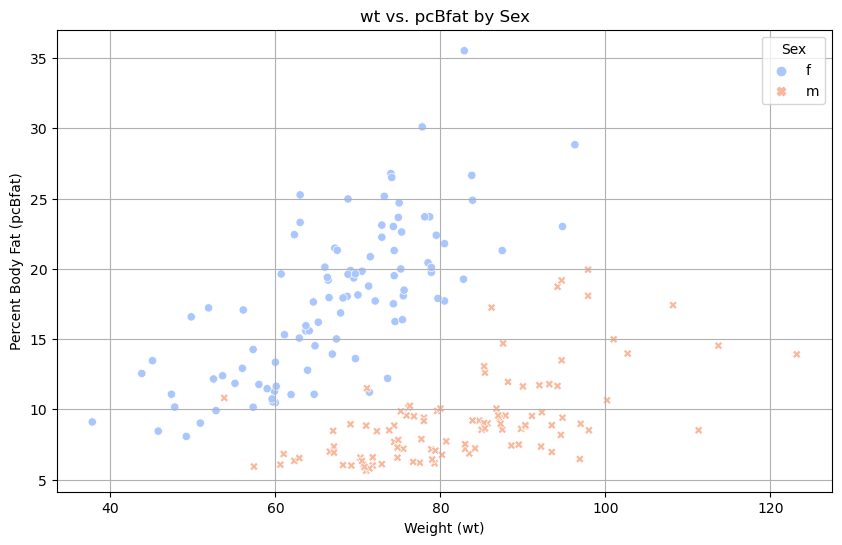

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wt'], y=df['pcBfat'], hue=df['sex'], palette='coolwarm', style=df['sex'])
plt.title('wt vs. pcBfat by Sex')
plt.xlabel('Weight (wt)')
plt.ylabel('Percent Body Fat (pcBfat)')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

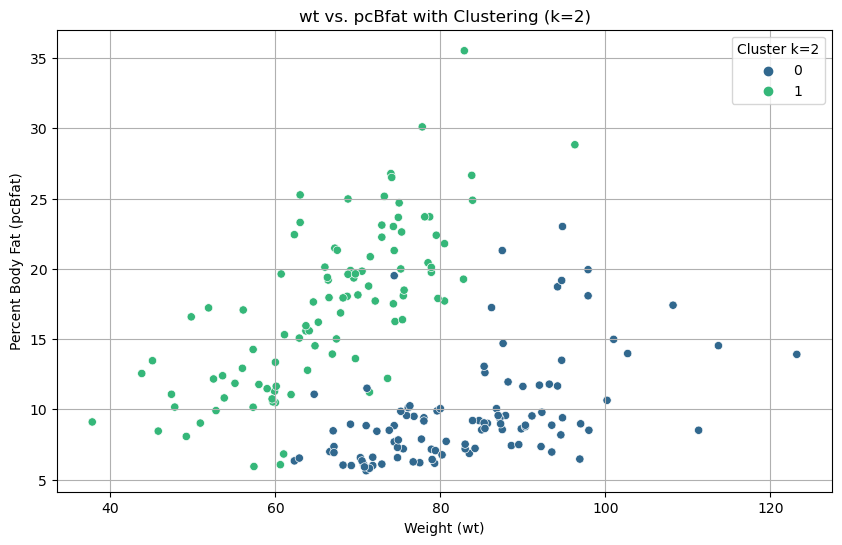

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wt'], y=df['pcBfat'], hue=df['Cluster_k2'], palette='viridis', legend='full')
plt.title('wt vs. pcBfat with Clustering (k=2)')
plt.xlabel('Weight (wt)')
plt.ylabel('Percent Body Fat (pcBfat)')
plt.legend(title='Cluster k=2')
plt.grid(True)
plt.show()

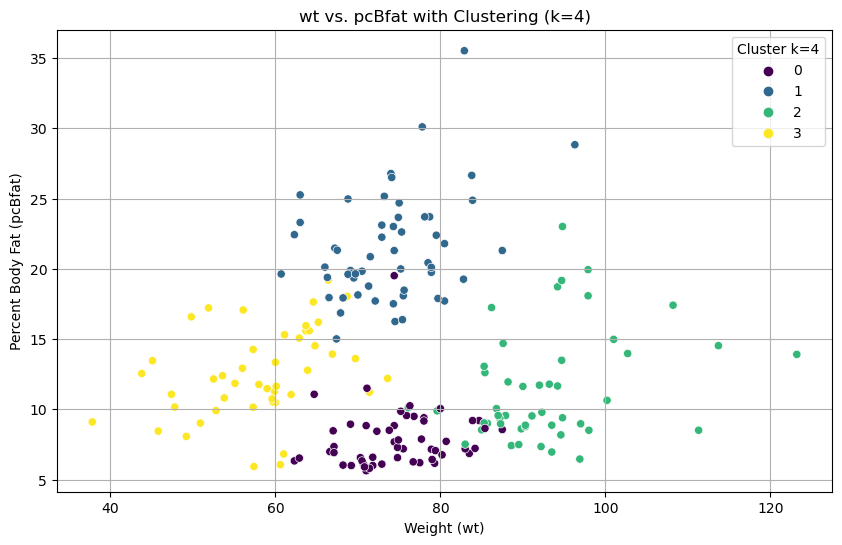

In [104]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wt'], y=df['pcBfat'], hue=df['Cluster_k4'], palette='viridis', legend='full')
plt.title('wt vs. pcBfat with Clustering (k=4)')
plt.xlabel('Weight (wt)')
plt.ylabel('Percent Body Fat (pcBfat)')
plt.legend(title='Cluster k=4')
plt.grid(True)
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



